## Imports

In [112]:
# project
from exo1 import MDP, Action
from TP1_python.gridworld import *
# stdlib
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

## Exercice 1: Dynamic Programming

### Q1: Define MDP

In [2]:
a00 = Action("a00", "s0", ["s0", "s1"], [0.55, 0.45], 0)
a01 = Action("a01", "s0", ["s0", "s1"], [0.3, 0.7], 0)
a02 = Action("a02", "s0", ["s0"], [1], 5/100)
a10 = Action("a10", "s1", ["s0"], [1], 0)
a11 = Action("a11", "s1", ["s1", "s2"], [0.4, 0.6], 0)
a12 = Action("a12", "s1", ["s1"], [1], 0)
a20 = Action("a20", "s2", ["s1"], [1], 0)
a21 = Action("a21", "s2", ["s1", "s2"], [0.6, 0.4], 1)
a22 = Action("a22", "s2", ["s2"], [1], 9/10)
actions = [a00, a01, a02, a10, a11, a12, a20, a21, a22]
mdp = MDP(actions)

### Q2: VI / PE

In [3]:
# Run value iteration algorithm
pi_1, hist = mdp.value_iterate()

Number of iteration for epsilon = 0.01 : 89 iterations


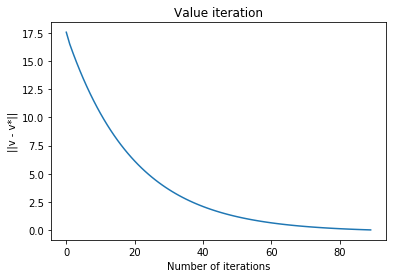

In [4]:
# Plot graph
v_hist = np.max(np.abs(hist - hist[-1]), axis=1)
plt.plot(v_hist)
plt.xlabel('Number of iterations')
plt.ylabel('||v - v*||')
plt.title('Value iteration')
plt.savefig('../report/e1q21.png')

In [5]:
print("The optimal policy found by value iteration algorithm is:", pi_1)

The optimal policy found by value iteration algorithm is: [1 1 2]


In [6]:
# Run policy evaluation on pi*
print("v* =", (mdp.policy_evaluation(pi_1)))

v* = [15.39115723 16.5483871  18.        ]


### Q3 : PI

In [7]:
# Run policy iteration algorithm
pi_2, hist_p = mdp.exact_policy_iterate(np.array([0,0,0]))

Number of iteration for pi0 = [0 0 0] : 4


In [8]:
print("the optimal policy found by policy iteration algorithm is: ", pi_2)

the optimal policy found by policy iteration algorithm is:  [1 1 2]


## Exercice 2: Reinforcement Learning

In [2]:
GridWorld1.grid

[['', '', '', 1], ['', 'x', '', -1], ['', '', '', '']]

In [28]:
# 0: right|1: down|2: left|3: up
GridWorld1.step(10, 2)

(9, 0.0, False)

In [4]:
GridWorld1.coord2state

array([[ 0,  1,  2,  3],
       [ 4, -1,  5,  6],
       [ 7,  8,  9, 10]])

In [5]:
GridWorld1.state_actions

[[0, 1],
 [0, 2],
 [0, 1, 2],
 [0],
 [1, 3],
 [0, 1, 3],
 [0],
 [0, 3],
 [0, 2],
 [0, 2, 3],
 [2, 3]]

In [7]:
max_act = max(map(len, GridWorld1.state_actions))
q = np.random.rand(GridWorld1.n_states, max_act)
gui.render_q(GridWorld1, q)

In [21]:
GridWorld1.reset()

7

### Q4: Policy evaluation

In [114]:
# setup
n_states = 11
n_actions = 4
discount_factor = 0.95
delta = 0.01
policy = [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3] # right if available, otherwise up
T_m = int(- np.log(delta) / (1 - discount_factor))
v_q4 = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.67106071, -0.99447514, 0.00000000, -0.82847001, -0.87691855,
        -0.93358351, -0.99447514]
print("T_max =", T_m)

T_max = 92


#### Estimate mu_0

In [37]:
# estimate mu
d = {i:0 for i in range(n_states)}
N = 100000
def estimate():
    for _ in range(N):
        d[GridWorld1.reset()] += 1
    return [d[i]/N for i in range(n_states)]
# mu_0 = estimate()
print("mu_0 distribution:", mu_0)

mu_0 distribution: [0.14031, 0.09148, 0.09141, 0.04088, 0.09151, 0.09013, 0.09185, 0.09084, 0.09078, 0.09055, 0.09026]


#### Compute V_n

In [106]:
def simulate_one_trajectory(policy, T_m, discount_factor):
    s0 = GridWorld1.reset()
    state = s0
    t = 1
    r = 0
    while t < T_m:
        action = policy[state]
        state, reward, term = GridWorld1.step(state, action)
        r += reward * discount_factor ** (t - 1)
        if term:
            break
        t += 1
    return s0, r

def compute_v_n(n, policy=policy, T_m=T_m, discount_factor=discount_factor):
    d = {i: [0, 0] for i in range(n_states)}
    for _ in range(n):
        s0, r = simulate_one_trajectory(policy, T_m, discount_factor)
        d[s0][0] += 1
        d[s0][1] += r
    V_n = [d[i][1] / d[i][0] if d[i][0] != 0 else 0 for i in range(n_states)]
    return V_n

In [88]:
# Compute J_p4
J_p4 = sum([v_q4[i] * mu_0[i] for i in range(n_states)])
print("J_p4 = ", J_p4)

J_p4 =  -0.059103820369200005


#### Plot $J_n - J^{\pi}$

In [109]:
## Compute J_n - J_pi
J_n = []
n = 10000
for i in range(n):
    vn = compute_v_n(i)
    jn = sum([vn[i] * mu_0[i] for i in range(n_states)])
    J_n.append(jn - J_p4)

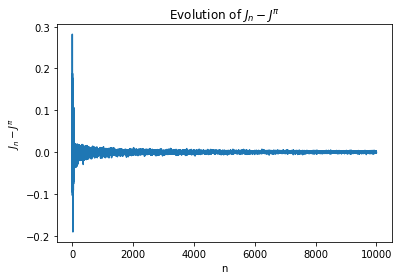

In [110]:
plt.plot(J_n)
plt.xlabel("n")
plt.ylabel("$J_n - J^{\pi}$")
plt.title("Evolution of $J_n - J^{\pi}$")
plt.savefig('../report/e2q1.png')

### Q5 : Policy optimization

In [111]:
v_s =  [0.877, 0.928, 0.988, 0, 0.824, 0.928, 0, 0.778, 0.824, 0.877, 0.828]

#### Implement Q-learning algorithm

In [149]:
def one_iteration_q_learning(q, T_m, discount_factor, eps):
    N = np.zeros((n_states, n_actions))
    s0 = GridWorld1.reset()
    state = s0
    t = 1
    r = 0
    while t < T_m:
        if random.random() < eps:
            action = random.choice(GridWorld1.state_actions[state])
        else:
            action = np.argmax(q[state, :])
            if action not in GridWorld1.state_actions[state]:
                action = random.choice(GridWorld1.state_actions[state])
        N[state, action] += 1
        state, reward, term = GridWorld1.step(state, action)
        r += reward * discount_factor ** (t - 1)
        if term:
            break
        t += 1
    return N, r

def q_learning(n, eps=0.15, T_m=T_m, discount_factor=discount_factor, q0=None):
    q = np.random.dirichlet(np.ones(n_actions), size=n_states) if q0 is None else q0
    count = 1
    while count < n:
        print("Iteration :", count, "\r", end="")
        qs = np.zeros((n_states, n_actions))
        N, r = one_iteration_q_learning(q, T_m, discount_factor, eps)
        for i in range(n_states):
            for j in range(n_actions):
                if j  in GridWorld1.state_actions[i]:
                    t1 = (1 - N[i, j]) * q[i, j]
                    jp, _, _ =  GridWorld1.step(i, j)
                    t2 = r + discount_factor * np.max(q[jp, :])
                    qs[i, j] = t1 + N[i, j] * t2
        q = qs
        count += 1
    return q

In [151]:
q_learning(10)

array([[-2.40002791, -3.30940217,  0.        ,  0.        ],
       [ 0.56768491,  0.        , -0.32737048,  0.        ],
       [ 0.44987595, -1.15839143,  0.14716665,  0.        ],
       [ 0.19616405,  0.        ,  0.        ,  0.        ],
       [ 0.        , 11.54979012,  0.        , 24.00755364],
       [ 0.09727757,  0.08974483,  0.        ,  3.07572134],
       [ 0.23255353,  0.        ,  0.        ,  0.        ],
       [35.21152422,  0.        ,  0.        , -2.82596354],
       [ 0.08974483,  0.        ,  3.65172945,  0.        ],
       [-0.45413453,  0.        , -0.37647669,  6.66612947],
       [ 0.        ,  0.        ,  0.18329804, -0.76744647]])